In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

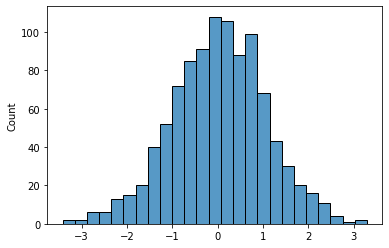

In [19]:
sns.histplot(sps.norm().rvs(1000));

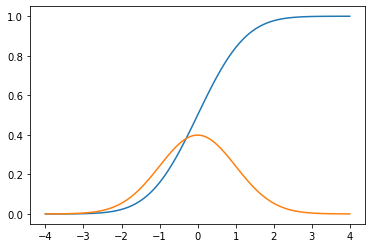

In [18]:
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 100)
sns.lineplot(x=x, y=sps.norm().cdf(x))
sns.lineplot(x=x, y=sps.norm().pdf(x));

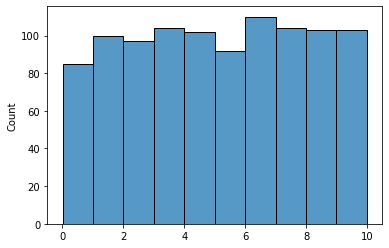

In [65]:
sns.histplot(sps.uniform(0, 10).rvs(1000), bins=10);

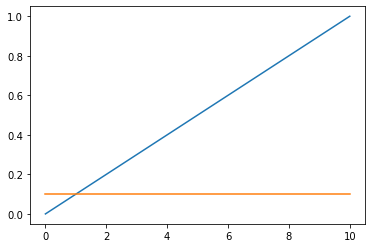

In [67]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 101)
sns.lineplot(x=x, y=sps.uniform(0, 10).cdf(x))
sns.lineplot(x=x, y=sps.uniform(0, 10).pdf(x));

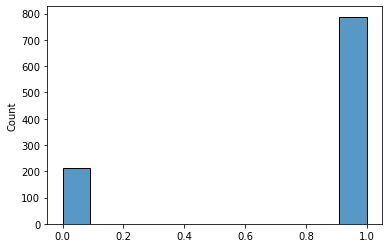

In [64]:
sns.histplot(sps.bernoulli(0.8).rvs(1000));

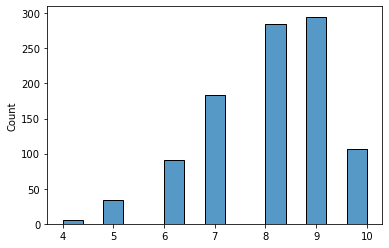

In [33]:
sns.histplot(sps.binom(10, 0.8).rvs(1000));

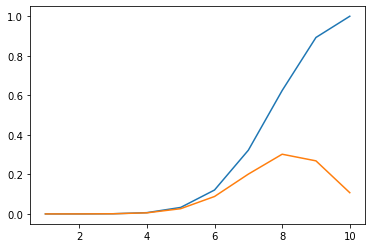

In [35]:
fig, ax = plt.subplots()
x = np.linspace(1, 10, 10)
sns.lineplot(x=x, y=sps.binom(10, 0.8).cdf(x))
sns.lineplot(x=x, y=sps.binom(10, 0.8).pmf(x));

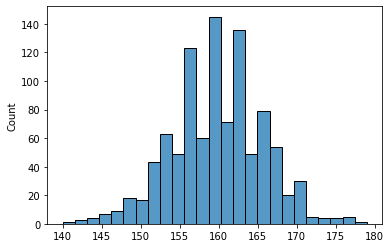

In [66]:
sns.histplot(sps.binom(200, 0.8).rvs(1000));

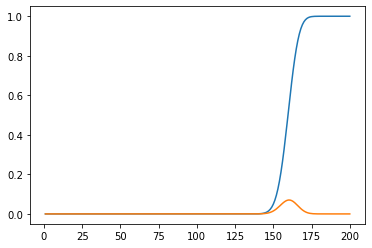

In [34]:
fig, ax = plt.subplots()
x = np.linspace(1, 200, 200)
sns.lineplot(x=x, y=sps.binom(200, 0.8).cdf(x))
sns.lineplot(x=x, y=sps.binom(200, 0.8).pmf(x));

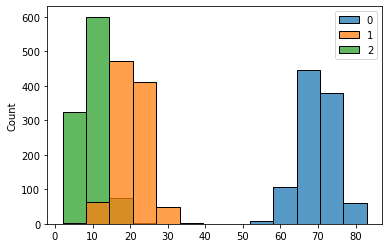

In [42]:
sns.histplot(sps.multinomial(100, [0.7, 0.2, 0.1]).rvs(1000));

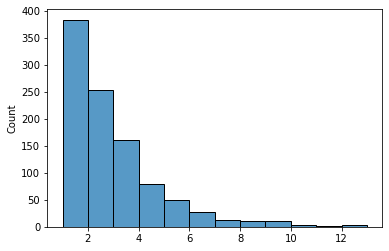

In [51]:
sns.histplot(sps.geom(0.4).rvs(1000), bins=12);

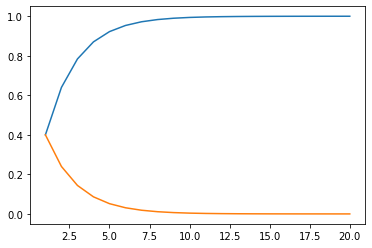

In [52]:
fig, ax = plt.subplots()
x = np.linspace(1, 20, 20)
sns.lineplot(x=x, y=sps.geom(0.4).cdf(x))
sns.lineplot(x=x, y=sps.geom(0.4).pmf(x));

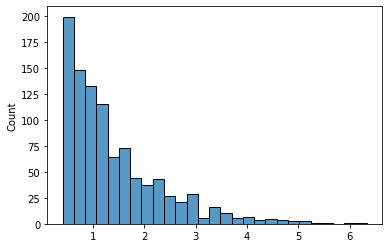

In [55]:
sns.histplot(sps.expon(0.4).rvs(1000));

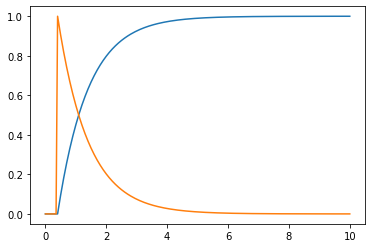

In [59]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 201)
sns.lineplot(x=x, y=sps.expon(0.4).cdf(x))
sns.lineplot(x=x, y=sps.expon(0.4).pdf(x));

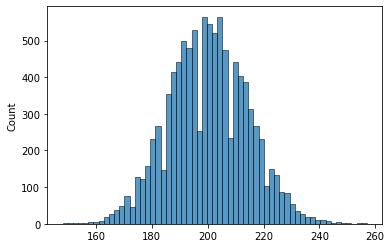

In [85]:
sns.histplot(sps.poisson(200).rvs(10000));

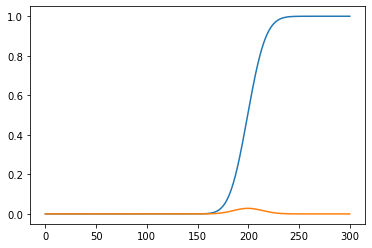

In [61]:
fig, ax = plt.subplots()
x = np.linspace(0, 300, 301)
sns.lineplot(x=x, y=sps.poisson(200).cdf(x))
sns.lineplot(x=x, y=sps.poisson(200).pmf(x));

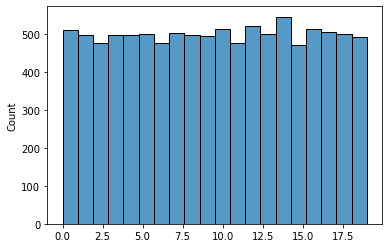

In [102]:
sns.histplot(sps.randint(0, 20).rvs(10000), bins=20);

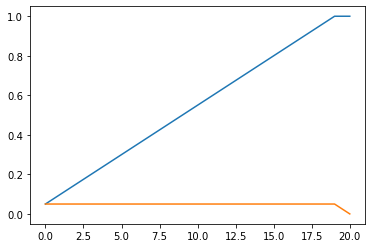

In [62]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 21)
sns.lineplot(x=x, y=sps.randint(0, 20).cdf(x))
sns.lineplot(x=x, y=sps.randint(0, 20).pmf(x));

In [45]:
nrm = sps.norm(10, 5).rvs(20)
nrm

array([12.44351387, 11.53946809, 10.47440766,  5.18873235,  2.99363528,
        7.91581359, 12.19253723, 16.33465641,  6.33215477,  4.44603071,
       11.26355251,  4.83604381, 12.27629662, 12.79828264,  5.90633971,
        7.92900335, 12.05564389, 18.2782305 ,  9.54219856, 18.60058149])

In [46]:
sps.describe(nrm)

DescribeResult(nobs=20, minmax=(2.993635276576015, 18.600581494155414), mean=10.167356150690953, variance=20.16200065388092, skewness=0.2613937519560973, kurtosis=-0.7239187319450653)

In [47]:
sps.sem(nrm)

1.0040418480790758

In [48]:
sps.shapiro(nrm)

ShapiroResult(statistic=0.950649619102478, pvalue=0.37705835700035095)

In [49]:
sps.normaltest(nrm)

NormaltestResult(statistic=0.592402263480374, pvalue=0.7436378438040239)

In [55]:
sps.ttest_1samp(nrm, 6)

Ttest_1sampResult(statistic=4.150580136339838, pvalue=0.0005432516026038451)

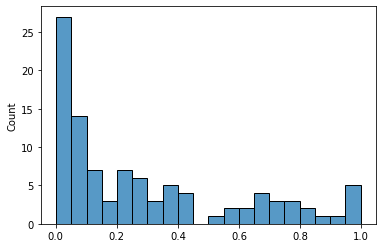

In [154]:
lst = [0] * 100
for i in range(100):
    nrm1 = sps.norm(7, 5).rvs(10)
    nrm2 = sps.norm(10, 5).rvs(10)
    lst[i] = sps.ttest_ind(nrm2, nrm1)[1]
sns.histplot(lst, bins=20);

In [218]:
nrm1 = sps.norm(10, 5).rvs(1000)
nrm1_1 = nrm1 + (np.random.rand(1000) * 2 - 1)
nrm1_2 = np.random.rand(1000) * 10 + 5

In [219]:
sps.ttest_rel(nrm1_1, nrm1)

Ttest_relResult(statistic=0.3734442077801581, pvalue=0.7088970933261061)

In [220]:
sps.ttest_rel(nrm1_2, nrm1)
# случайно нагенеренные величины из того же диапазона считает связанными с nrm1. 
# Ну, и правильно: средние идентичны = эффекта нет

Ttest_relResult(statistic=-0.10702608374688757, pvalue=0.9147897753779821)

In [223]:
sps.normaltest(nrm1_1), sps.normaltest(nrm1_2)

(NormaltestResult(statistic=2.0238344921947387, pvalue=0.3635213511307518),
 NormaltestResult(statistic=687.1030461703258, pvalue=6.272913149845825e-150))

Делаю 100 случайных выборок из какого-нибудь распределения несколько раз. Считаю средние и делаю на них тест на нормальность хи-квадрат Пирсона. Получившееся значение p-value складываю в массив. Так 1000 раз. Строю гистограмму. Для нормального распределения должна быть более-менее равномерная. А для других?

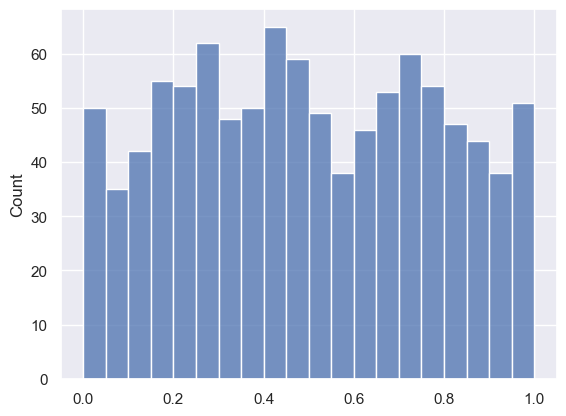

In [70]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.norm(10, 5).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

In [71]:
p_values[-1]

0.33957211460845244

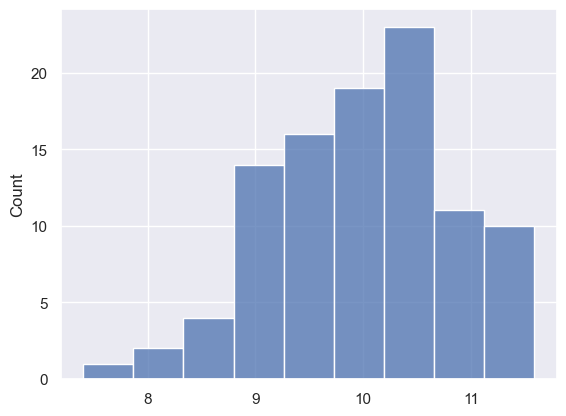

In [72]:
sns.histplot(means);

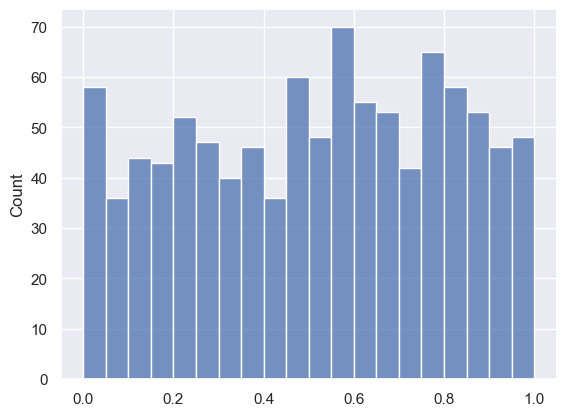

In [54]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.uniform(0, 10).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

In [55]:
p_values[-1]

0.4860235224121192

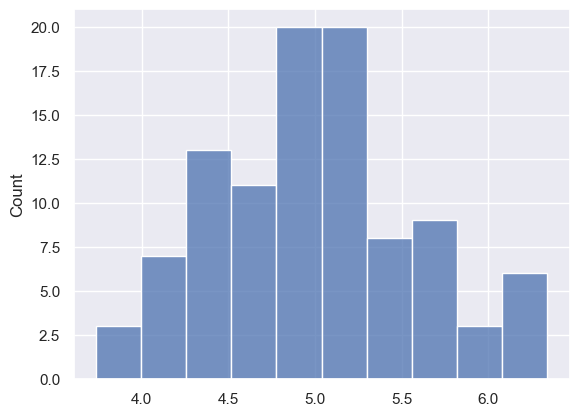

In [56]:
sns.histplot(means, bins=10);

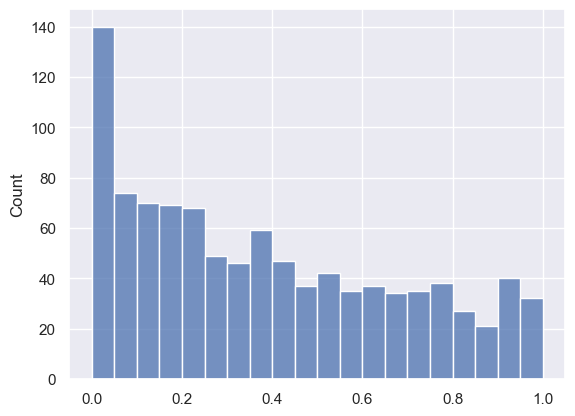

In [60]:
# bernoulli на 0,8 не равномерна
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.bernoulli(0.8).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

In [61]:
p_values[-1]

0.9269546688119497

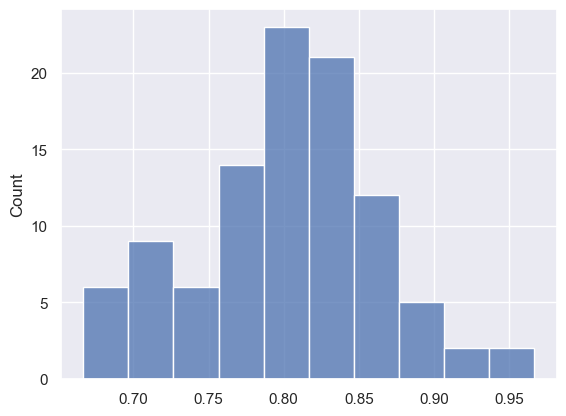

In [62]:
sns.histplot(means, bins=10);

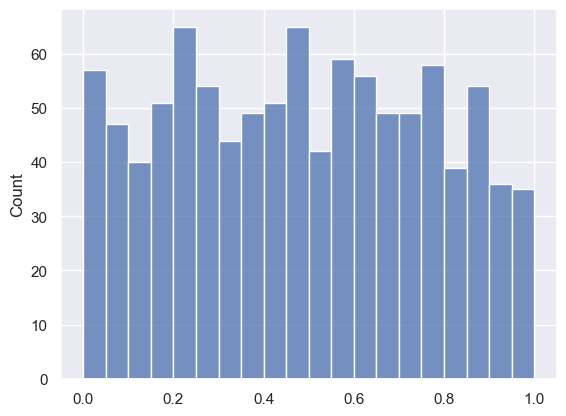

In [84]:
# нарастим выборку с 30 до 300 и уже все равномерно
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.bernoulli(0.8).rvs(1000)
    means = np.array([np.random.choice(nrm, 300).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

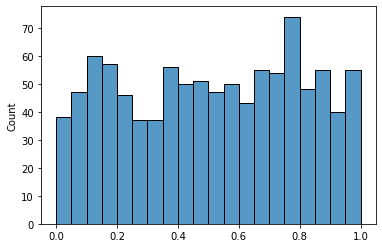

In [99]:
# bernoulli на 0,5 равномерна
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.bernoulli(0.5).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

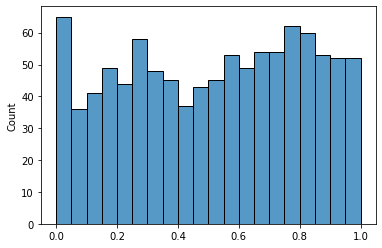

In [102]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.binom(100, 0.8).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

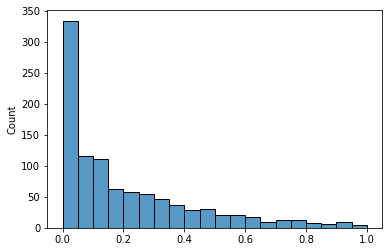

In [104]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.geom(0.8).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

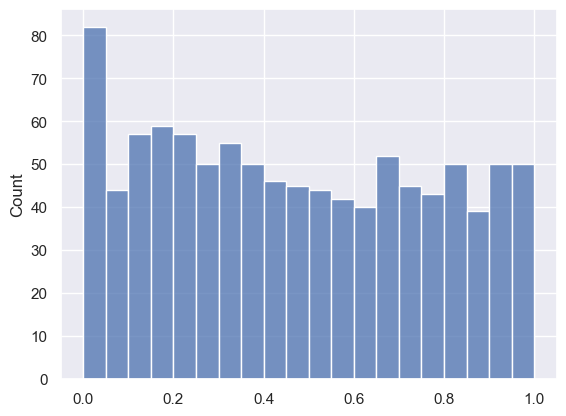

In [91]:
# поднимем выборку с 30 до 300
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.geom(0.8).rvs(1000)
    means = np.array([np.random.choice(nrm, 300).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

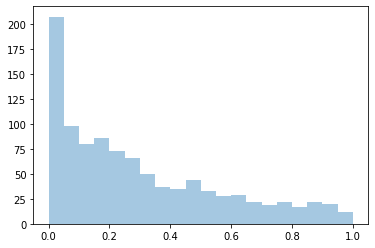

In [9]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.geom(0.5).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.distplot(p_values, bins=20, kde=False);

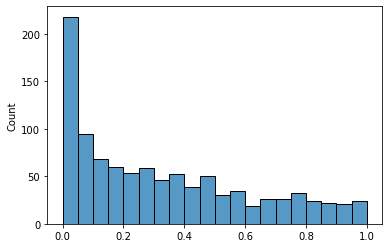

In [105]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.geom(0.2).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

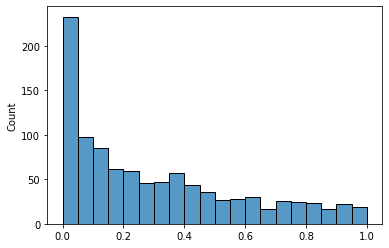

In [106]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.expon(0.8).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

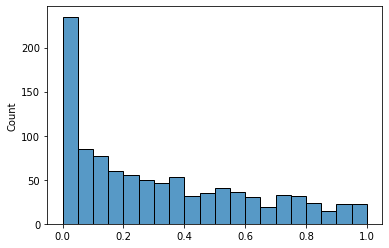

In [107]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.expon(0.2).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

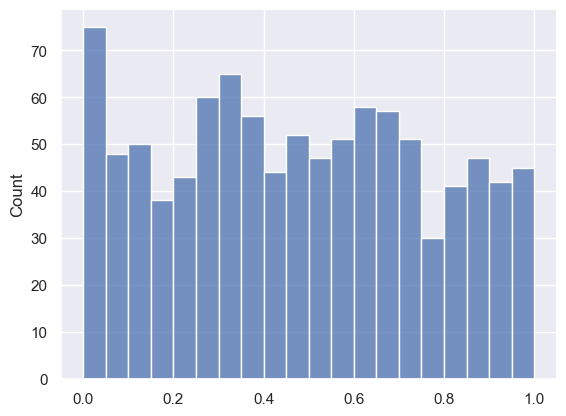

In [97]:
# поднимем выборку с 30 до 300
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.expon(0.8).rvs(1000)
    means = np.array([np.random.choice(nrm, 300).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

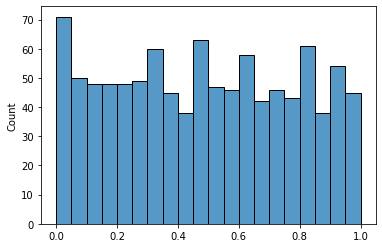

In [108]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.poisson(200).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

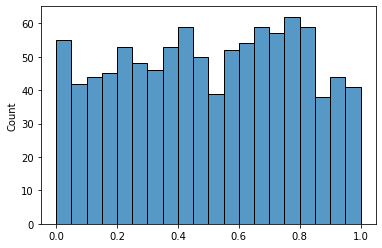

In [109]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.randint(0, 20).rvs(1000)
    means = np.array([np.random.choice(nrm, 30).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

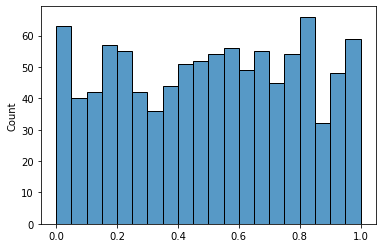

In [110]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.randint(0, 20).rvs(1000)
    means = np.array([np.random.choice(nrm, 300).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

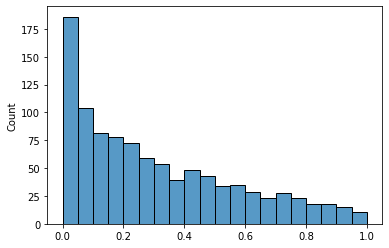

In [114]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.randint(0, 20).rvs(1000)
    means = np.array([np.random.choice(nrm, 2).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

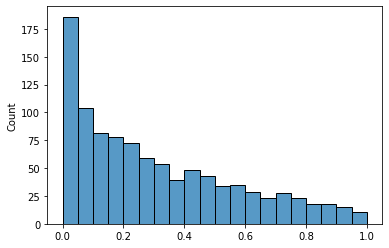

In [114]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.randint(0, 20).rvs(1000)
    means = np.array([np.random.choice(nrm, 2).mean() for _ in range(100)])
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);

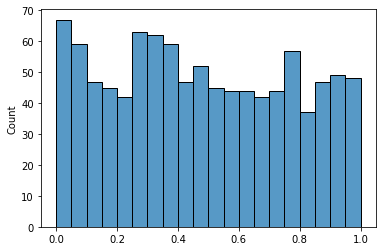

In [115]:
N = 1000
p_values = np.array([0.0] * N)
for i in range(N):
    nrm = sps.randint(0, 20).rvs(1000)
    means = np.array([np.random.choice(nrm, 3).mean() for _ in range(100)])
    # уже при выборке в три элемента вполне равномерно мое распределение. 
    # При 2 скошено, при 1 почти всегда ненормально
    p_values[i] = sps.normaltest(means)[1]
sns.histplot(p_values, bins=20, binrange=[0, 1]);